## *Business Problem* 
To develop a data-driven analytical model that identifies key demographic and financial factors influencing loan approval decisions, with the goal of enhancing the accuracy, transparency, and fairness of the loan eligibility assessment process.

### *Environmental Setup*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### *Loading Data*

In [6]:
df = pd.read_csv("LoanData.csv")

### *Data understanding*

In [7]:
df.shape

(614, 13)

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [11]:
df.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [12]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

5

In [13]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### *Data Exploration*

In [14]:
df["Loan_ID"].nunique()

614

*All unique columns will be better if we drop this column*

In [16]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

*Some missing values -nan noticed*

In [17]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [19]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

*Some missing values*

In [20]:
df["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [21]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [45]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [22]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [23]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [24]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [25]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [26]:
df["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [46]:
df["ApplicantIncome"].value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

In [47]:
df["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [48]:
df["ApplicantIncome"].skew()

6.539513113994625

*Skewness > 0 , right skewed, for saftely will visualize it*

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

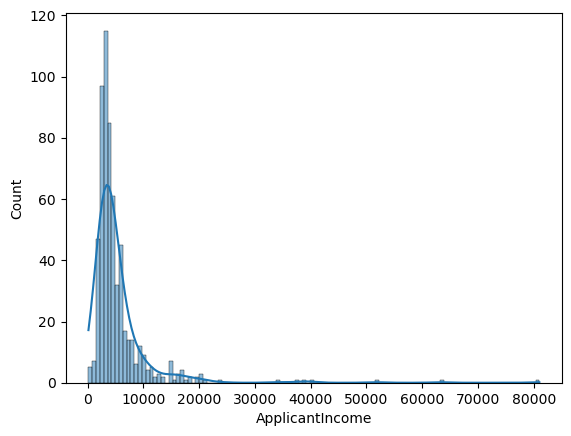

In [49]:
sns.histplot(data = df, x = "ApplicantIncome", kde = True)

*Right tail plot*

<Axes: xlabel='ApplicantIncome'>

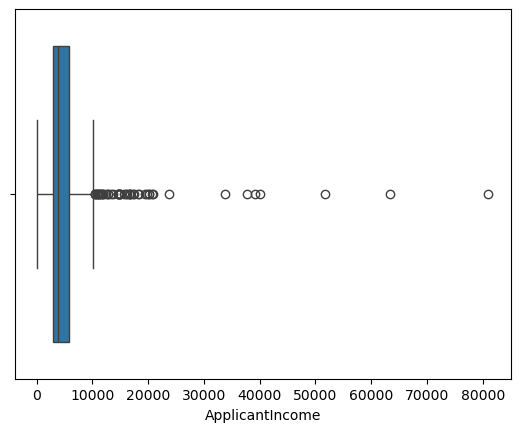

In [51]:
sns.boxplot(data = df, x = "ApplicantIncome")

*A large number of outliers are present here*

In [27]:
df["CoapplicantIncome"].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [52]:
df["CoapplicantIncome"].value_counts()

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64

In [53]:
df["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [54]:
df["CoapplicantIncome"].skew()

7.491531216657306

*Right skewed as values > 0*

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

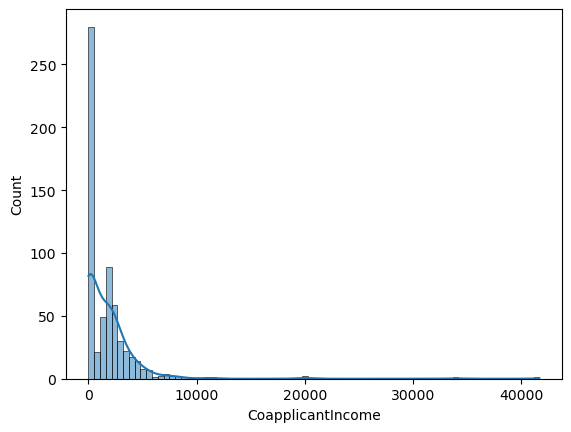

In [56]:
sns.histplot(data= df, x = "CoapplicantIncome", kde = True)

*Right tail graph*

<Axes: xlabel='CoapplicantIncome'>

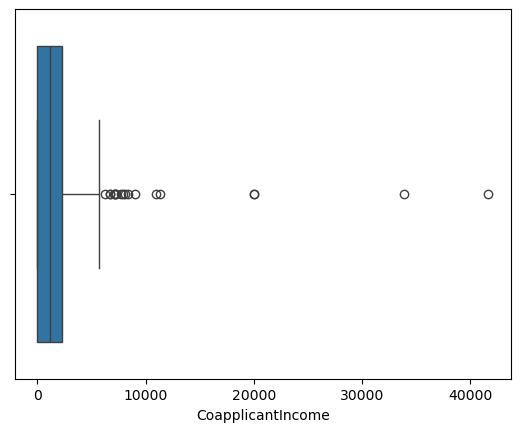

In [57]:
sns.boxplot(data= df, x = "CoapplicantIncome")

*A large number of outliers present in the data set*

In [28]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [39]:
df["LoanAmount"].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [40]:
df["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<Axes: xlabel='LoanAmount'>

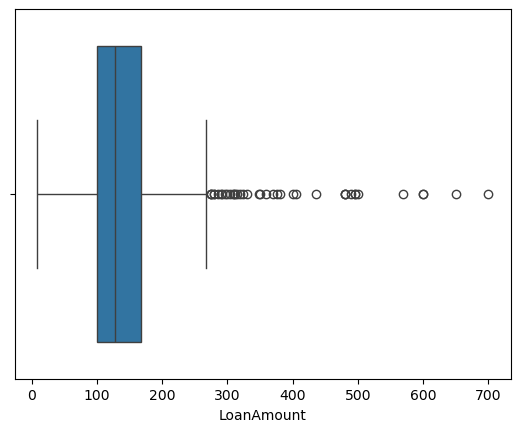

In [38]:
sns.boxplot(data = df, x = "LoanAmount")

*A large number of outliers can be seen clearly from the box plot*

In [41]:
df["LoanAmount"].skew()

2.677551679256059

*Skewness > 0 , clearly indicate that its right skewed, just for be clear will see through histogram*

<Axes: xlabel='LoanAmount', ylabel='Count'>

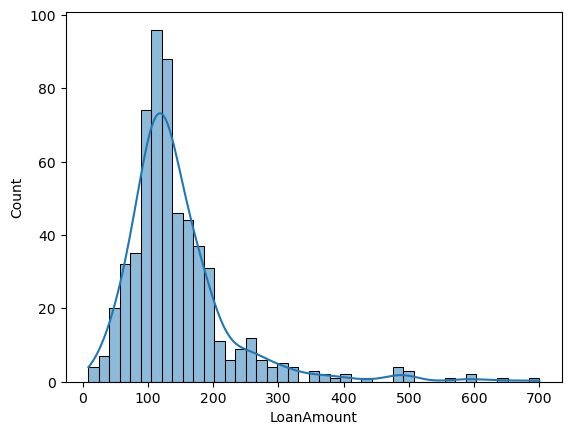

In [42]:
sns.histplot(data = df, x = "LoanAmount", kde = True)

*Ok so the graph shows its right tail graph*

In [43]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [44]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [30]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [31]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [32]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [33]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [34]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [35]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [58]:
df["overall_income"] = df["ApplicantIncome"]+ df["CoapplicantIncome"]

In [59]:
df["overall_income"].value_counts()

overall_income
6000.0     5
3750.0     4
4583.0     4
2500.0     4
8334.0     3
          ..
4923.0     1
5100.0     1
11000.0    1
6232.0     1
7583.0     1
Name: count, Length: 554, dtype: int64

In [60]:
df["overall_income"].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: overall_income, dtype: float64

In [61]:
df["overall_income"].skew()

5.633448514884535

*right skewed as value > 0*

<Axes: xlabel='overall_income', ylabel='Count'>

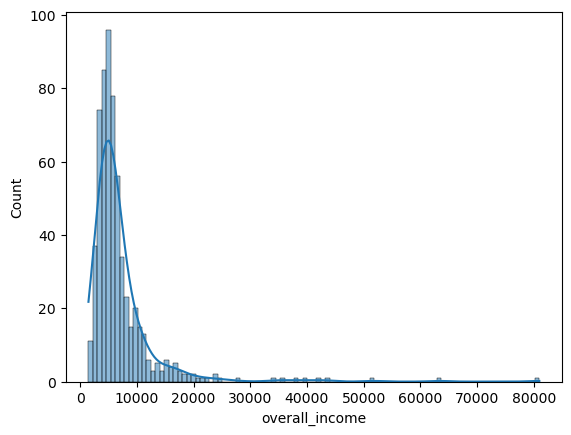

In [63]:
sns.histplot(data= df, x = "overall_income", kde = True)

*right tail graph indicates overall income for few are much higher than the majority*

<Axes: xlabel='overall_income'>

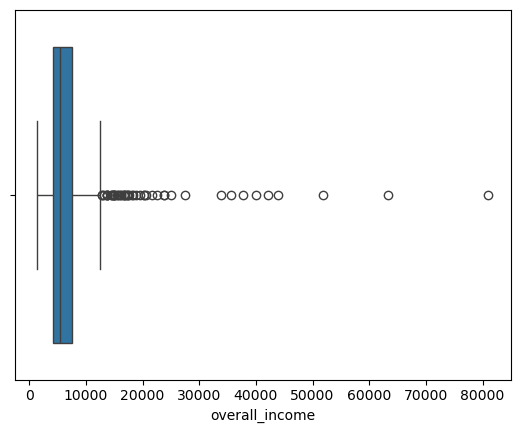

In [64]:
sns.boxplot(data= df, x = "overall_income")

*A large number of outliers are present here in overall income*

### *Data Cleaning*

*Since Loan_ID has every unique value it of no use So  we will drop that* 

In [70]:
df.drop(columns=["Loan_ID"],inplace=True)

*Since we have made a new column overall income so we can drop ApplicantIncome & CoapplicantIncome*

In [71]:
df.drop(columns=['ApplicantIncome','CoapplicantIncome'], inplace=True)

*Department column was having some values (3+) which can be replaced by 3 so that the dtype can be in int format*

In [72]:
 df["Dependents"].replace({"3+":3},inplace = True)

*Since some columns were categorical and were having some missing values so its better to handle the missing values with mode*

In [73]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

*Since some columns were having the wrong data type so trating the wrong data types*

In [74]:
df["Dependents"] = df["Dependents"].astype('int')
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype('Int64')

*Treating the outliers*

<Axes: xlabel='overall_income'>

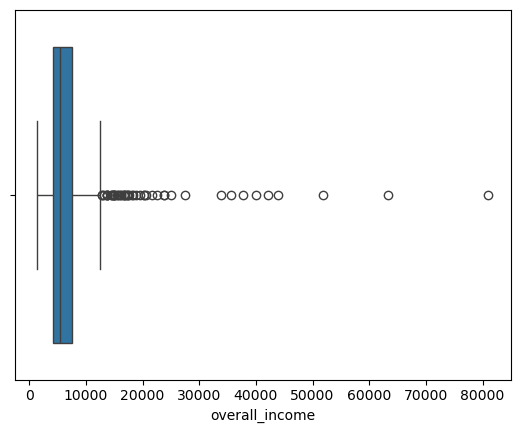

In [75]:
sns.boxplot(data = df, x = "overall_income")

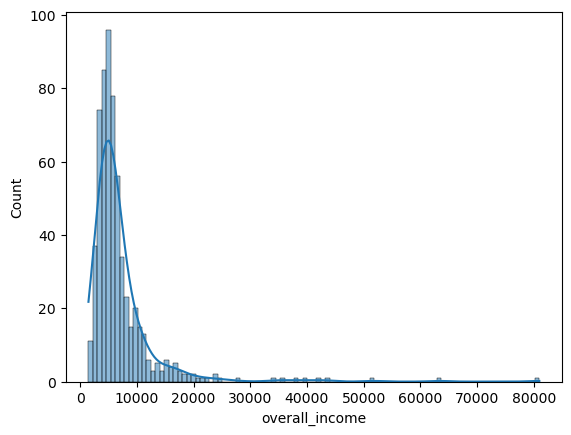

In [76]:
sns.histplot(df['overall_income'], kde=True)
plt.show()

*Lets reduce the skewness to someextend using the logtransformation*

In [77]:
df['overall_income_log'] = np.log1p(df['overall_income'])

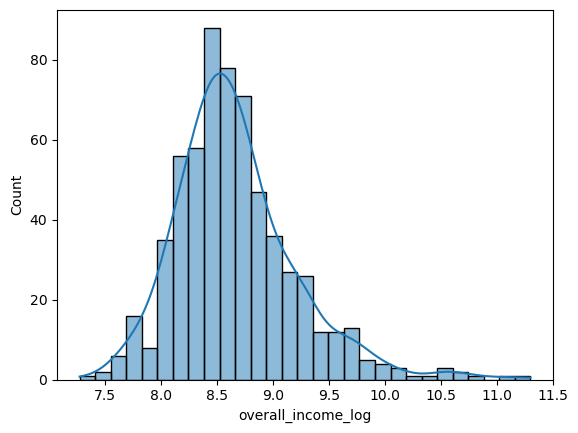

In [78]:
sns.histplot(df['overall_income_log'], kde=True)
plt.show()

*Now the graph looks good not much right tail as from the earlier ones*

In [79]:
Q1 = df['overall_income_log'].quantile(0.25)
Q3 = df['overall_income_log'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

*Lets remove the outliers*

In [81]:
df_filtered = df[(df['overall_income_log'] >= lower_bound) & (df['overall_income_log'] <= upper_bound)]

*To Cap Outliers (Winsorization)*

In [82]:
df['overall_income_log_capped'] = df['overall_income_log'].clip(lower_bound, upper_bound)

*Convert Log Back*

In [83]:
df['overall_income_cleaned'] = np.expm1(df['overall_income_log_capped'])

*Since the new column called overall_income_cleaned is free from oulier and is a cleaned row we can drop the column overall_income*

In [84]:
df.drop(columns=["overall_income"],inplace=True)

In [86]:
df.drop(columns=["overall_income_log"],inplace=True)

*Since out project is not for machine learning its just data exploration i can drop overall_income_log_capped*

In [88]:
df.drop(columns=["overall_income_log_capped"],inplace=True)

<Axes: xlabel='LoanAmount'>

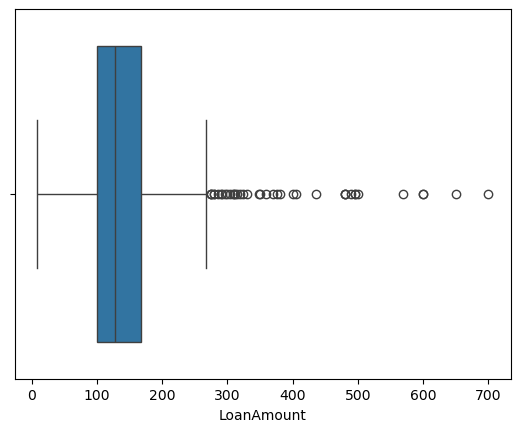

In [90]:
sns.boxplot(data = df, x = "LoanAmount")

*Now lets start treatement of outliers for LoanAmount as from the box plot we can see clearly a high number of outliers*

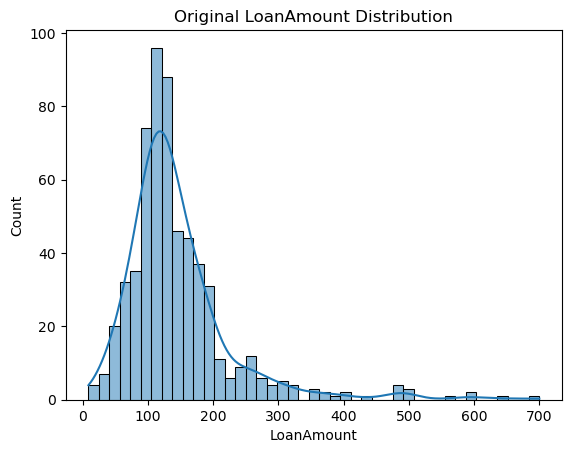

In [91]:
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Original LoanAmount Distribution")
plt.show()

*Applying log transformation to reduce skewness*

In [92]:
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])

*Handle Outliers Using IQR on Transformed Column*

In [93]:
Q1 = df['LoanAmount_log'].quantile(0.25)
Q3 = df['LoanAmount_log'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['LoanAmount_log_capped'] = df['LoanAmount_log'].clip(lower_bound, upper_bound)

*Convert Back to Original Scale (Cleaned)*

In [94]:
df['LoanAmount_cleaned'] = np.expm1(df['LoanAmount_log_capped'])

*As the new column is cleaned so we can drop the usless columns*

In [96]:
df.drop(['LoanAmount', 'LoanAmount_log', 'LoanAmount_log_capped'], axis=1, inplace=True)

In [101]:
df.isna().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status                0
overall_income_cleaned     0
LoanAmount_cleaned        22
dtype: int64

*Handling the missing values*

In [105]:
median_value = df['LoanAmount_cleaned'].median()
df['LoanAmount_cleaned'].fillna(median_value, inplace=True)

In [106]:
df['LoanAmount_cleaned'].isnull().sum()

0

In [109]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360    512
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: count, dtype: Int64

In [110]:
mode_value = df['Loan_Amount_Term'].mode()[0]
df['Loan_Amount_Term'].fillna(mode_value, inplace=True)

In [210]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)

In [117]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

*Though its a numerical but it will behave like a binary categorical*

In [118]:
mode_val = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(mode_val, inplace=True)

In [120]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,overall_income_cleaned,LoanAmount_cleaned
0,Male,No,0,Graduate,No,360,1.0,Urban,Y,5849.0,128.0
1,Male,Yes,1,Graduate,No,360,1.0,Rural,N,6091.0,128.0
2,Male,Yes,0,Graduate,Yes,360,1.0,Urban,Y,3000.0,66.0


*Renaming the columns*

In [121]:
df.rename(columns={'overall_income_cleaned': 'overall_income',
                  "LoanAmount_cleaned": "LoanAmount"}, inplace=True)

### *Data Analysis & Data Visualization*

In [150]:
continous = ["overall_income","LoanAmount"]
count = ["Dependents","Loan_Amount_Term",]
categorical = ["Gender","Married","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]

*Univariate Analysis - Categorical Variables* 

In [123]:
# 1
# What is the gender distribution for apllicants ?
df["Gender"].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [125]:
# 2 
# What is the percnetage of male and female 
(df['Gender'].value_counts(normalize=True) * 100)

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

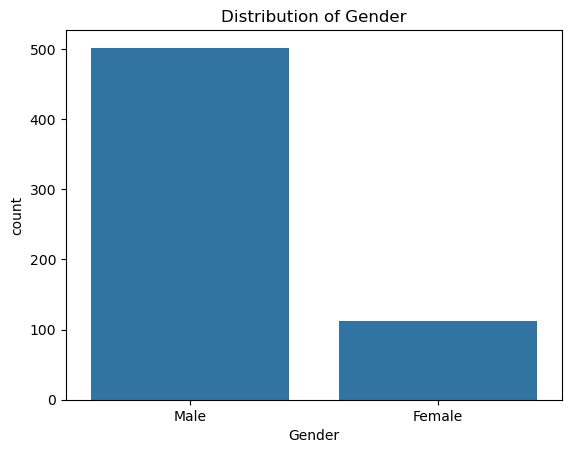

In [126]:
# 3
# Count plot for gender Distribution ?
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

In [127]:
# 4
# How many applicants are married vs. unmarried?
df["Married"].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [128]:
# 5
# What is the percentage distribution of Matrital Status?
(df['Married'].value_counts(normalize=True) * 100)

Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64

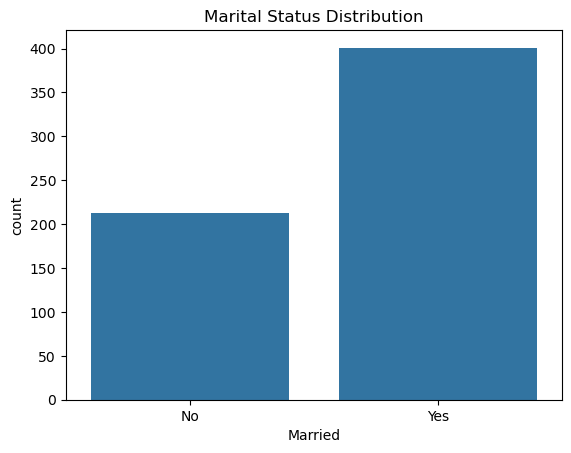

In [129]:
# 6 
# Count plot for married vs unmarried 
sns.countplot(x='Married', data=df)
plt.title('Marital Status Distribution')
plt.show()

In [130]:
# 7
#  What is the education level distribution (Graduate vs. Non-Graduate)?
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [131]:
# 8 
# What is the percentage distribution of Education status?
(df['Education'].value_counts(normalize=True) * 100)

Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

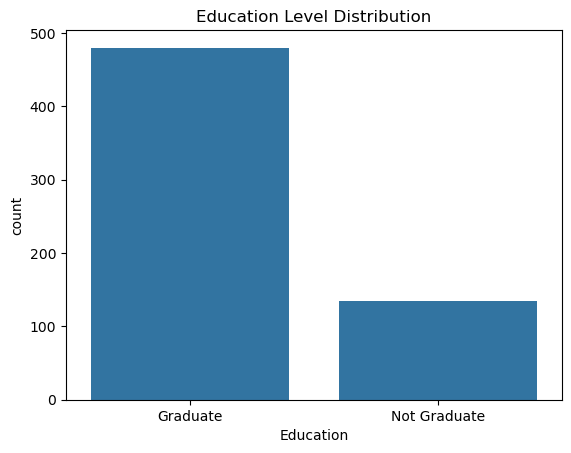

In [132]:
# 9
# Count plot for education distribution
sns.countplot(x='Education', data=df)
plt.title('Education Level Distribution')
plt.show()

In [133]:
# 10
# How many applicants are self-employed?
df["Self_Employed"].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [134]:
# 11
# What is the percentage distribution of Self Employment status?
(df['Self_Employed'].value_counts(normalize=True) * 100)

Self_Employed
No     86.644951
Yes    13.355049
Name: proportion, dtype: float64

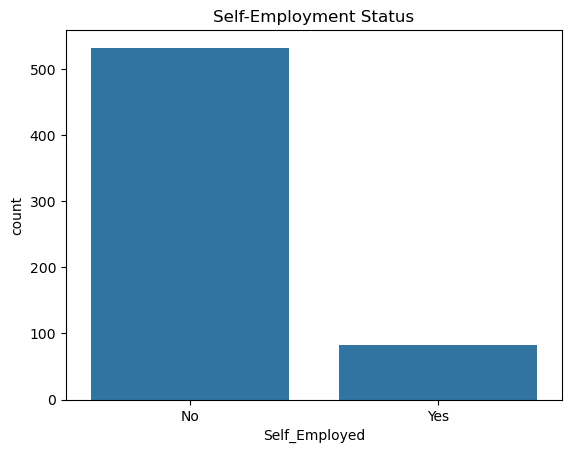

In [135]:
# 12
# Count plot for self employed applicants
sns.countplot(x='Self_Employed', data=df)
plt.title('Self-Employment Status')
plt.show()

In [151]:
# 13
# What is the credit histrory 
df["Credit_History"].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [152]:
# 14
# What is the distribution of Property Area ?
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

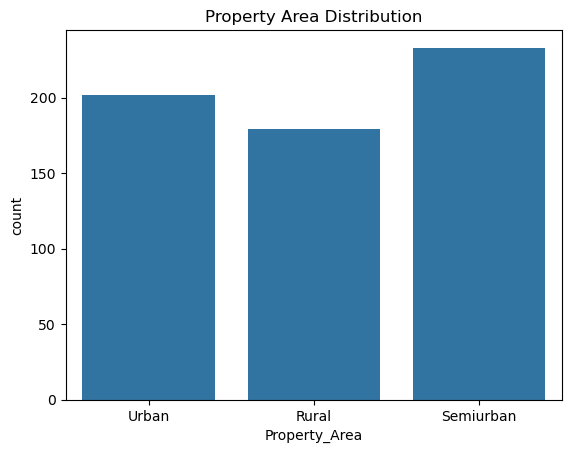

In [153]:
# 15
# Count plot for the property distribution
sns.countplot(x='Property_Area', data=df)
plt.title('Property Area Distribution')
plt.show()

<Axes: ylabel='count'>

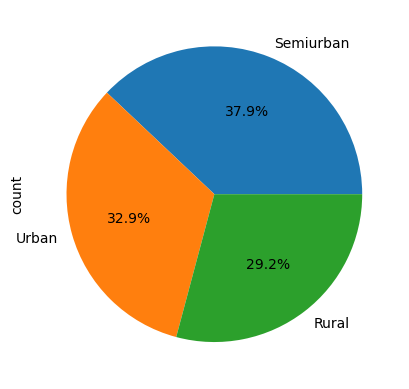

In [154]:
# 16
# Plot a pie chart for Property_Area distribution
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')

In [155]:
# 17
# What is the loan approval status distribution
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

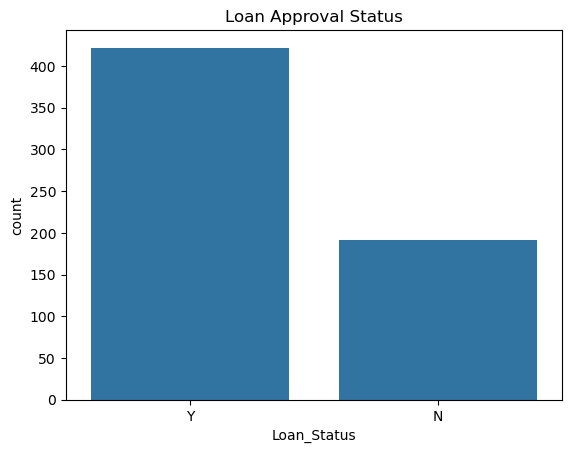

In [156]:
# 18
# Count plot for Loan approval status
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status')
plt.show()

*Univariate Analysis for Continous Variable*

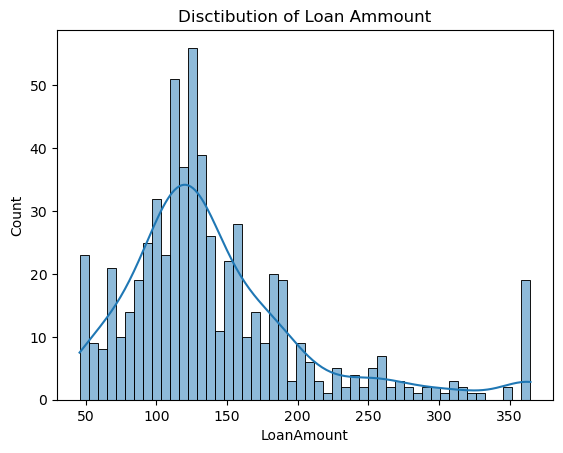

In [163]:
# 19
#  What is the distribution of LoanAmount? 
sns.histplot(data = df, x = "LoanAmount", kde = True, bins = 50)
plt.title('Disctibution of Loan Ammount')
plt.show()

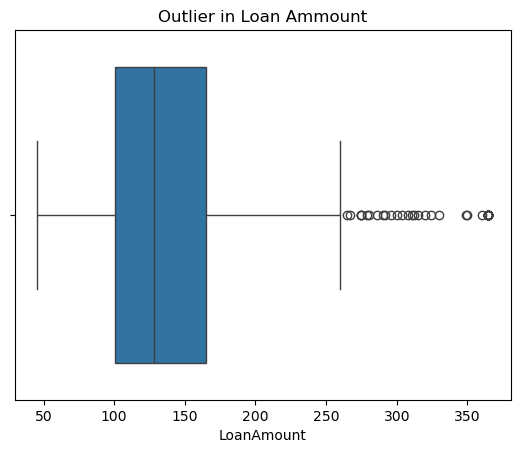

In [165]:
# 20
#Is there any outlier in the LoanAmount column? 
sns.boxplot(x=df['LoanAmount'])
plt.title('Outlier in Loan Ammount')
plt.show()

In [166]:
# 21
# What are the summary statistics for LoanAmount?
df['LoanAmount'].describe()

count    614.000000
mean     142.260379
std       67.543214
min       45.663077
25%      100.250000
50%      128.000000
75%      164.750000
max      364.792419
Name: LoanAmount, dtype: float64

In [168]:
# 22
# What is the skewness for LoanAmount
df['LoanAmount'].skew()

1.504209252494154

In [169]:
#23
# What is the summary stastics for Overall income?
df['overall_income'].describe()

count      614.000000
mean      6523.279236
std       3732.422477
min       1716.895910
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      18246.411182
Name: overall_income, dtype: float64

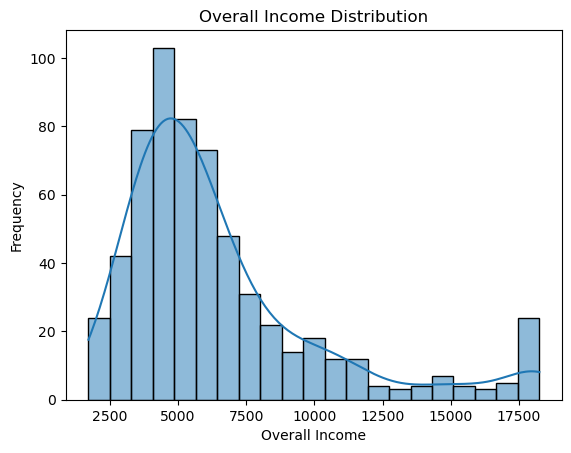

In [171]:
#24
# What is the distribution plot for oberall income ?
sns.histplot(df['overall_income'], kde=True)
plt.title("Overall Income Distribution")
plt.xlabel("Overall Income")
plt.ylabel("Frequency")
plt.show()

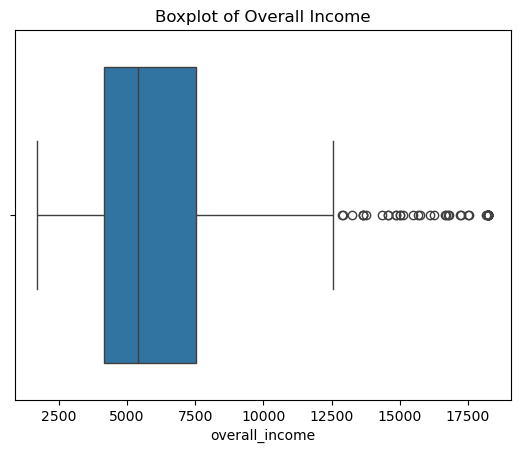

In [172]:
# 25
# are there any utliers present in the overall income ?
sns.boxplot(x=df['overall_income'])
plt.title("Boxplot of Overall Income")
plt.show()

In [173]:
# 26
# What is the skewness for the Overall income?
df['overall_income'].skew()

1.6817625375830036

*Univariate analysis for Count variable*

In [176]:
# 27
# What are the total dependent in the given data set?
print(df['Dependents'].value_counts())

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64


In [177]:
#28
# What is the percentage of dependent?
print(df['Dependents'].value_counts(normalize=True) * 100)

Dependents
0    58.631922
1    16.612378
2    16.449511
3     8.306189
Name: proportion, dtype: float64


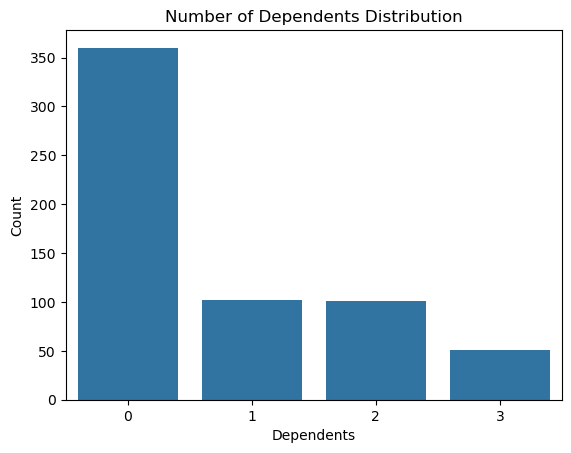

In [178]:
# 29
# What is the distribution of Dependents in terms of number?
sns.countplot(x='Dependents', data=df)
plt.title("Number of Dependents Distribution")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

In [179]:
# 30
# What is the frequency distribution for Laon Amount Term
print(df['Loan_Amount_Term'].value_counts())

Loan_Amount_Term
360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: count, dtype: Int64


In [180]:
# 31
# What is the percentage of frequency distribution for Laon Amount Term
print(df['Loan_Amount_Term'].value_counts(normalize=True) * 100)

Loan_Amount_Term
360    85.667752
180     7.166124
480     2.442997
300     2.117264
240     0.651466
84      0.651466
120     0.488599
60      0.325733
36      0.325733
12      0.162866
Name: proportion, dtype: Float64


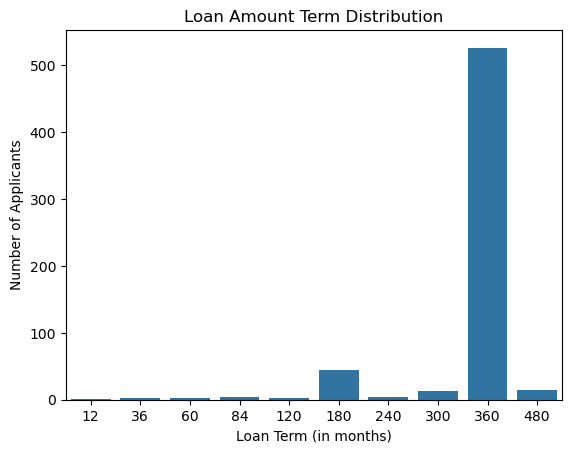

In [181]:
# 32
# What is the count for the Loan amount term 
sns.countplot(x='Loan_Amount_Term', data=df)
plt.title("Loan Amount Term Distribution")
plt.xlabel("Loan Term (in months)")
plt.ylabel("Number of Applicants")
plt.show()

*Bivariate Analysis for Categorical Vs Categorical*

In [182]:
# 33
# How does gender afftect Loan status
pd.crosstab(df["Gender"],df["Loan_Status"])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [183]:
# 34
# How does gender afftect Loan status in percentage 
pd.crosstab(df["Gender"],df["Loan_Status"],normalize = "index")*100

Loan_Status,N,Y
Gender,,
Female,33.035714,66.964286
Male,30.876494,69.123506


<Axes: xlabel='Gender', ylabel='count'>

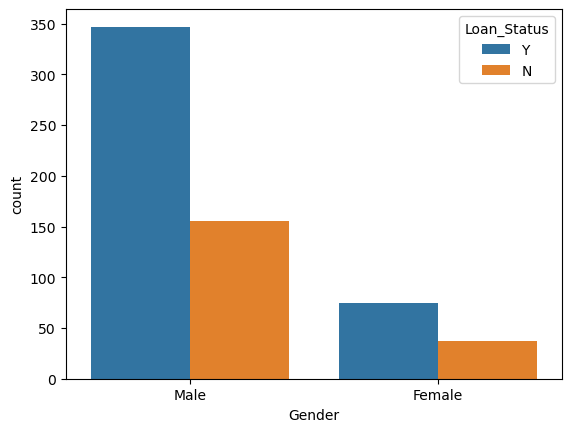

In [184]:
# 35
# Count plot to show how gender afftect Loan status
sns.countplot(x="Gender", hue = "Loan_Status",data = df)

In [185]:
#36
# HOw does Marital Status afftect Loan Status
pd.crosstab(df["Married"],df["Loan_Status"])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


<Axes: xlabel='Married', ylabel='count'>

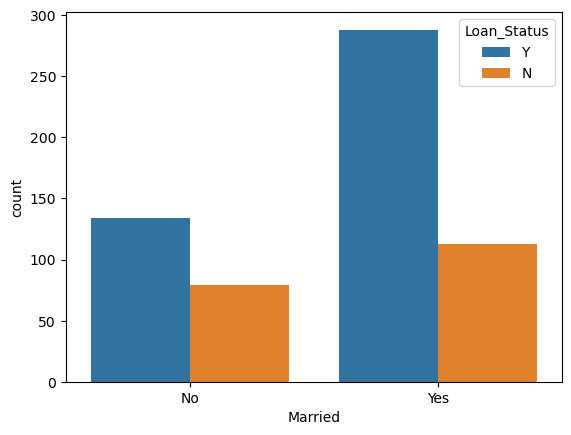

In [186]:
# 37
# Count plot for  Marital Status afftect Loan Status 
sns.countplot(x="Married", hue ="Loan_Status", data = df)

In [187]:
# 38
# What is the relationship between Edication and loan status
pd.crosstab(df["Education"],df["Loan_Status"])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<Axes: xlabel='Education', ylabel='count'>

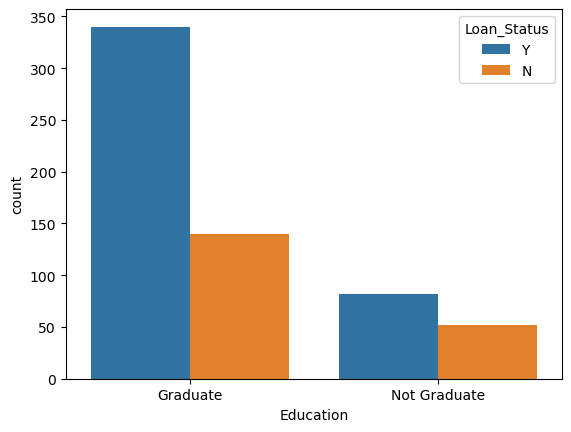

In [188]:
# 39
# count plot to show relationship between Edication and loan status
sns.countplot(x="Education",hue ="Loan_Status", data = df )

In [189]:
# 40
# Is there any impact of Self Employement status on Loan Status
pd.crosstab(df["Self_Employed"],df["Loan_Status"])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


<Axes: xlabel='Self_Employed', ylabel='count'>

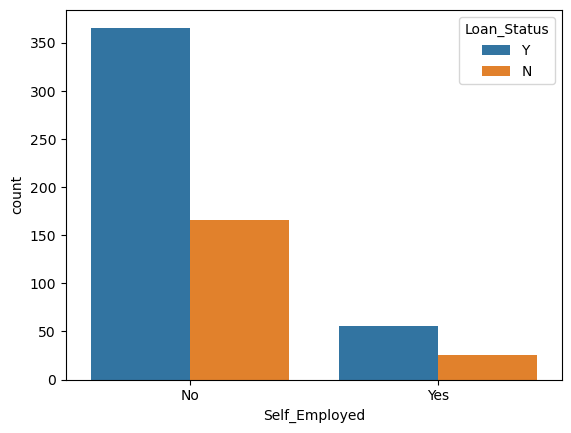

In [190]:
# 41
# Count plot  impact of Self Employement status on Loan Status
sns.countplot(x="Self_Employed",hue ="Loan_Status", data = df)

In [191]:
# 42
# How is property area related to Loan status
pd.crosstab(df["Property_Area"],df["Loan_Status"])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


<Axes: xlabel='Property_Area', ylabel='count'>

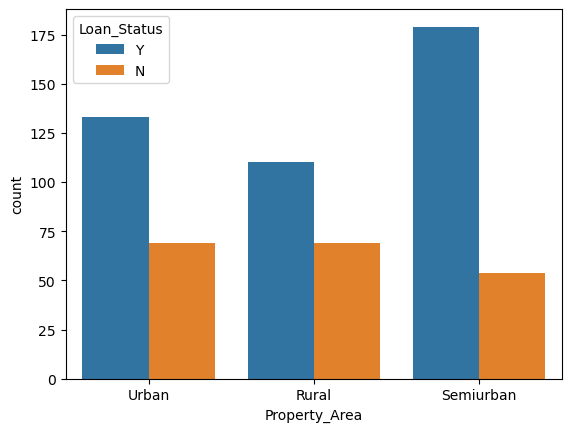

In [192]:
# 43
# Count plot to show How is property area related to Loan status
sns.countplot(x="Property_Area",hue ="Loan_Status", data = df)

In [193]:
# 44
# What is the relationship between Credit History and Loan Status?
pd.crosstab(df["Credit_History"],df["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


<Axes: xlabel='Credit_History', ylabel='count'>

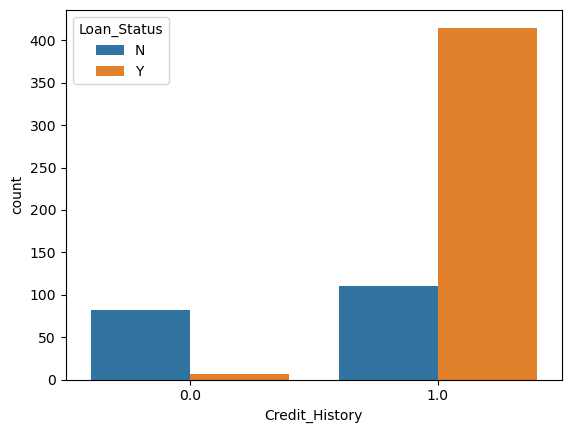

In [194]:
# 45
# Count plot to show the relationship between Credit History and Loan Status?
sns.countplot(x="Credit_History",hue ="Loan_Status", data = df)

In [195]:
# 46
# How do Dependents afftect loan Status
pd.crosstab(df['Dependents'], df['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3,18,33


<Axes: xlabel='Dependents', ylabel='count'>

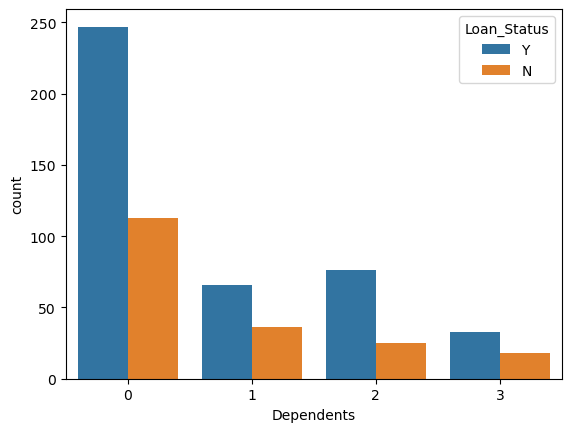

In [196]:
# 47
# Count plot to show how Dependents afftect loan Status
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

*Biavriate Anlysis for Continous vs Categorical* 

In [197]:
# 48
# What is the average LoanAmount for each Loan_Status category?
df.groupby("Loan_Status")["LoanAmount"].mean()

Loan_Status
N    147.030997
Y    140.089861
Name: LoanAmount, dtype: float64

In [198]:
# 49
# What is the average LoanAmount for different Education levels?
df.groupby("Education")["LoanAmount"].mean()

Education
Graduate        148.710876
Not Graduate    119.154122
Name: LoanAmount, dtype: float64

In [199]:
# 50
#  What is the average overall_income for each Loan_Status?
df.groupby("Loan_Status")["overall_income"].mean()

Loan_Status
N    6597.317749
Y    6489.593467
Name: overall_income, dtype: float64

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

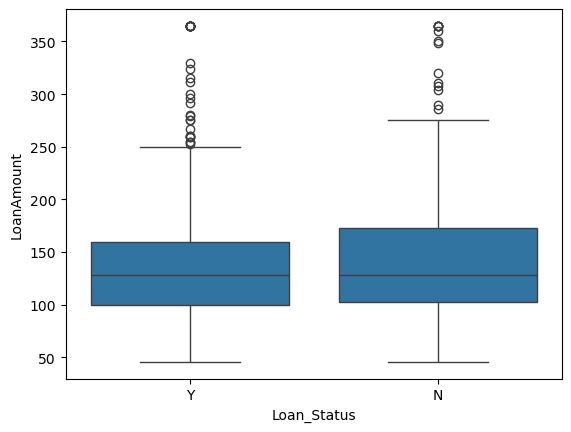

In [200]:
# 51
#  What is the distribution of LoanAmount for each Loan_Status?
sns.boxplot(x="Loan_Status",y = "LoanAmount",data = df)

<Axes: xlabel='Loan_Status', ylabel='overall_income'>

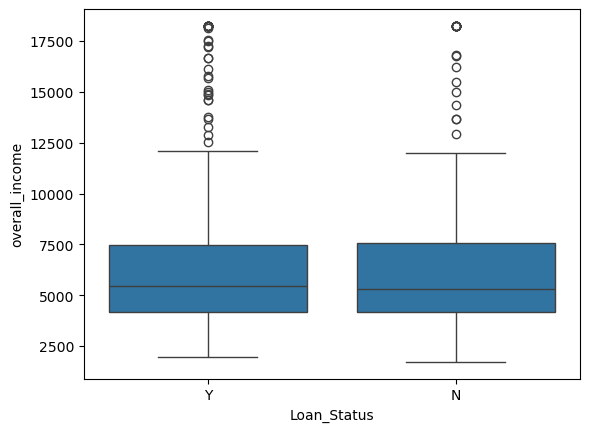

In [201]:
# 52
# What is the distribution of overall_income for each Loan_Status? 
sns.boxplot(x="Loan_Status",y="overall_income",data = df)

*Bivariate Analysis for Categorical vs Categorical (Grouped Summary)*

In [203]:
# 53
# What is the average LoanAmount for different Property_Area categories?
df.groupby("Property_Area")["LoanAmount"].mean()

Property_Area
Rural        148.692028
Semiurban    141.822888
Urban        137.065677
Name: LoanAmount, dtype: float64

In [204]:
# 54
# What is the average LoanAmount based on Credit_History?
df.groupby("Credit_History")["LoanAmount"].mean()

Credit_History
0.0    141.652139
1.0    142.363490
Name: LoanAmount, dtype: float64

In [205]:
# 55
# What is the average overall_income by Education level?
df.groupby("Education")["overall_income"].mean()

Education
Graduate        6932.928239
Not Graduate    5055.879820
Name: overall_income, dtype: float64

*Bivariate Analysis for count vs count variable*

Crosstab of Dependents vs Loan_Amount_Term:
 Loan_Amount_Term  12   36   60   84   120  180  240  300  360  480
Dependents                                                        
0                   1    1    1    0    2   19    1    6  318   11
1                   0    1    0    2    0   11    2    2   83    1
2                   0    0    0    2    1    6    1    3   86    2
3                   0    0    1    0    0    8    0    2   39    1


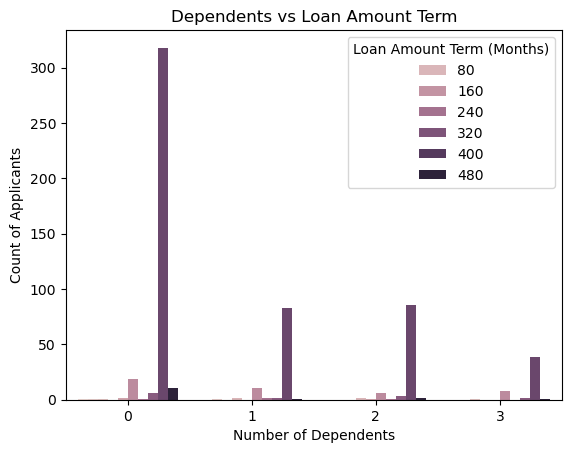

In [212]:
# 56
# How does the loan amount term distribution vary across different numbers of dependents?
ct = pd.crosstab(df['Dependents'], df['Loan_Amount_Term'])
print("Crosstab of Dependents vs Loan_Amount_Term:\n", ct)

sns.countplot(x='Dependents', hue='Loan_Amount_Term', data=df)
plt.title("Dependents vs Loan Amount Term")
plt.xlabel("Number of Dependents")
plt.ylabel("Count of Applicants")
plt.legend(title="Loan Amount Term (Months)")
plt.show()

*Multivariate Analysis*

In [213]:
# 57
# How does Property_Area and Credit_History together affect Loan_Status?
pd.crosstab([df['Property_Area'], df['Credit_History']], df['Loan_Status'])

Loan_Status                    N    Y
Property_Area Credit_History         
Rural         0.0             26    2
              1.0             43  108
Semiurban     0.0             26    4
              1.0             28  175
Urban         0.0             30    1
              1.0             39  132

<Axes: xlabel='Property_Area', ylabel='count'>

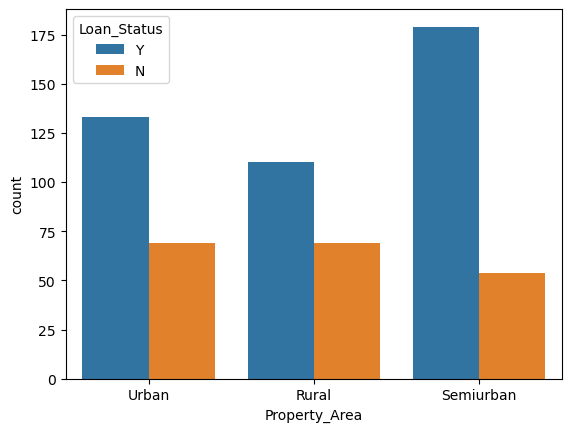

In [215]:
# 58
# Count plot to show how Property_Area and Credit_History together affect Loan_Status?
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

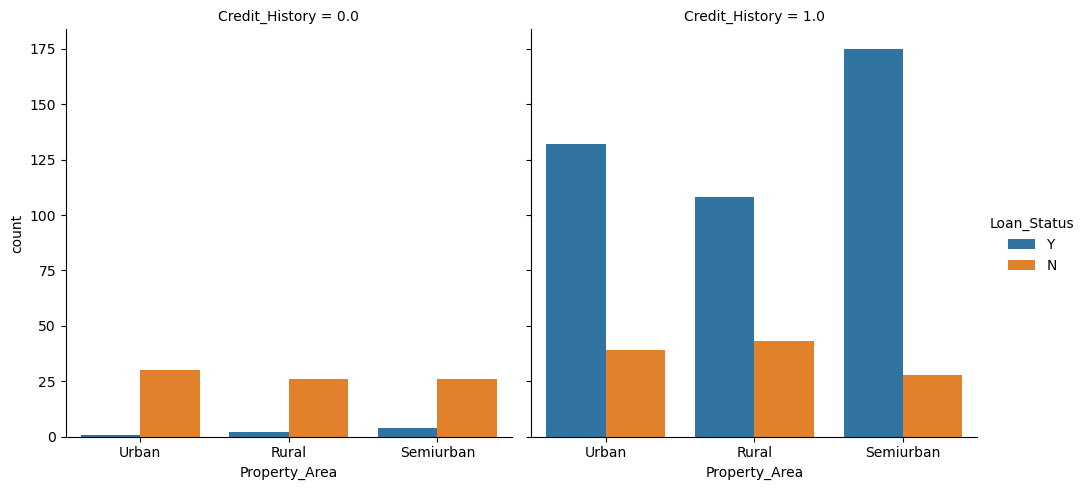

In [216]:
# 59
# Visualization using cat plot to show how Property_Area and Credit_History together affect Loan_Status?
sns.catplot(x='Property_Area', hue='Loan_Status', col='Credit_History', data=df, kind='count')

In [217]:
# 60
# How Gender and Marital Status together impact Loan_Status?
pd.crosstab([df["Gender"],df["Married"]],df['Loan_Status'])

Loan_Status       N    Y
Gender Married          
Female No        29   51
       Yes        8   24
Male   No        50   83
       Yes      105  264

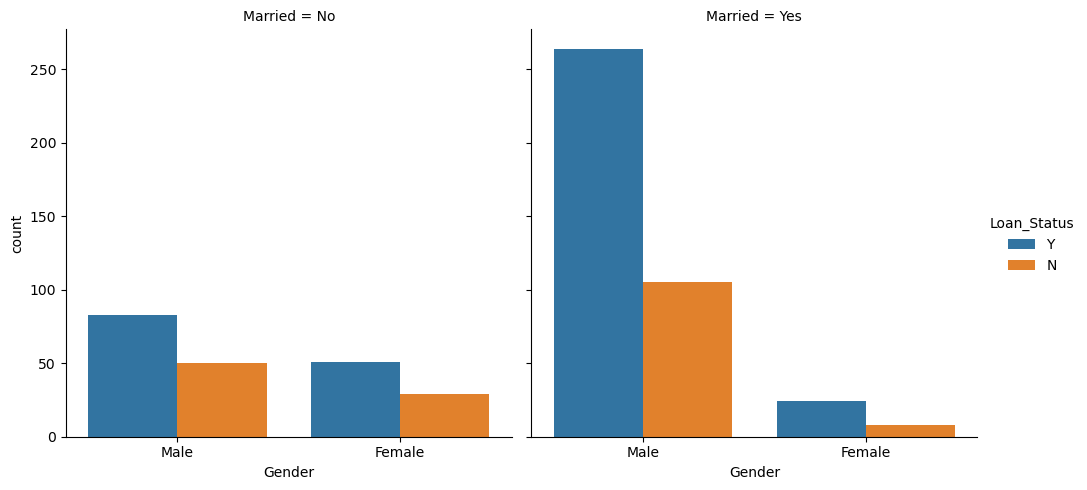

In [218]:
# 61
# Cat plot to show how Gender and Marital Status together impact Loan_Status?
sns.catplot(x="Gender",hue = "Loan_Status",col="Married",data = df,kind="count")

In [219]:
# 62
# How do Education and Self_Employed status together affect Loan_Status?
pd.crosstab([df['Education'], df['Self_Employed']], df['Loan_Status'])

Loan_Status                   N    Y
Education    Self_Employed          
Graduate     No             121  294
             Yes             19   46
Not Graduate No              45   72
             Yes              7   10

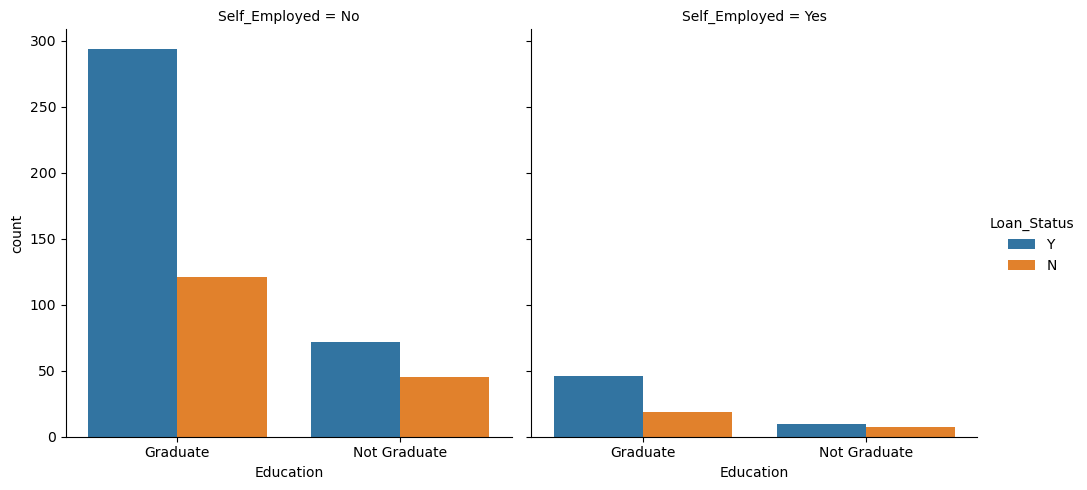

In [220]:
# 63
# Cat plot to show How do Education and Self_Employed status together affect Loan_Status?
sns.catplot(x='Education', hue='Loan_Status', col='Self_Employed', data=df, kind='count')

In [221]:
# 64
# How does Property_Area, Education, and Loan_Status interact?
pd.crosstab([df['Property_Area'], df['Education']], df['Loan_Status'])

Loan_Status                  N    Y
Property_Area Education            
Rural         Graduate      47   84
              Not Graduate  22   26
Semiurban     Graduate      43  144
              Not Graduate  11   35
Urban         Graduate      50  112
              Not Graduate  19   21

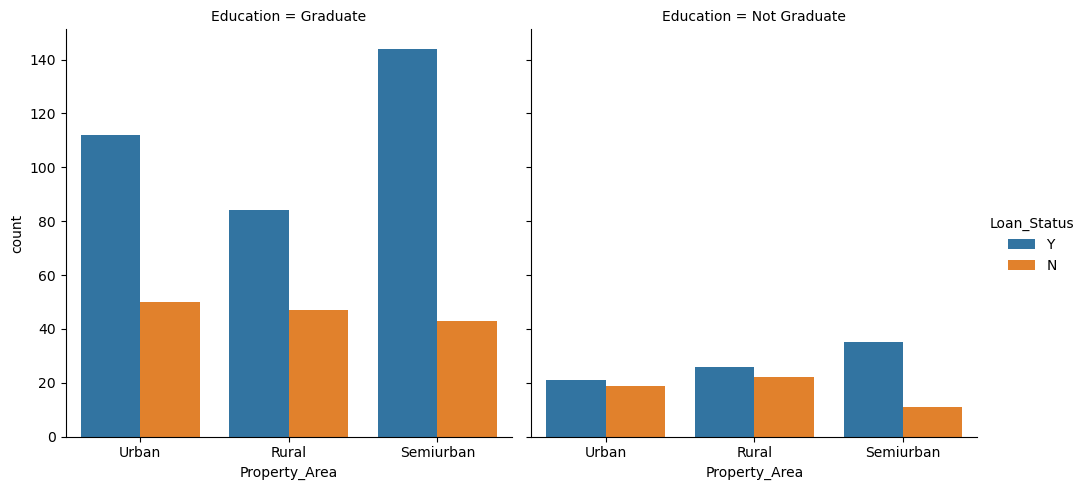

In [222]:
# 65
# Cat plot to show how does Property_Area, Education, and Loan_Status interact?
sns.catplot(x='Property_Area', hue='Loan_Status', col='Education', data=df, kind='count')

In [223]:
# 66 
# What is the average LoanAmount by Property_Area and Loan_Status?
df.groupby(['Property_Area', 'Loan_Status'])['LoanAmount'].mean()

Property_Area  Loan_Status
Rural          N              152.599670
               Y              146.240871
Semiurban      N              151.662823
               Y              138.854417
Urban          N              137.837415
               Y              136.665301
Name: LoanAmount, dtype: float64

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

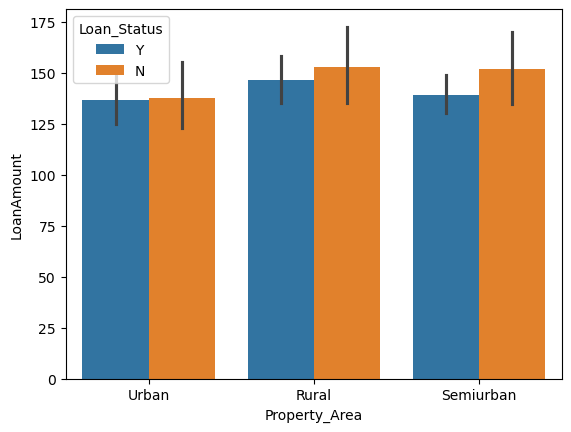

In [224]:
# 67 
# Bar plot for the average LoanAmount by Property_Area and Loan_Status?
sns.barplot(x='Property_Area', y='LoanAmount', hue='Loan_Status', data=df)

In [225]:
# 68
#  What is the average overall_income by Education and Loan_Status?
df.groupby(['Education', 'Loan_Status'])['overall_income'].mean()

Education     Loan_Status
Graduate      N              7227.143656
              Y              6811.780715
Not Graduate  N              4901.632614
              Y              5153.695122
Name: overall_income, dtype: float64

<Axes: xlabel='Education', ylabel='overall_income'>

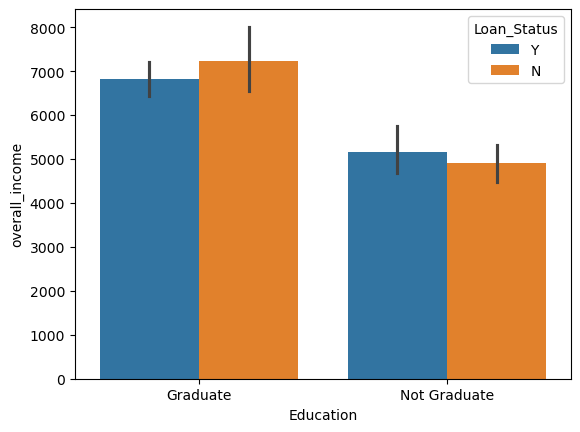

In [226]:
# 69
# BAr plot for the average overall_income by Education and Loan_Status?
sns.barplot(x='Education', y='overall_income', hue='Loan_Status', data=df)

In [227]:
# 70
# What is the average LoanAmount by Credit_History and Loan_Status?
df.groupby(['Credit_History', 'Loan_Status'])['LoanAmount'].mean()

Credit_History  Loan_Status
0.0             N              139.003023
                Y              172.684631
1.0             N              153.015486
                Y              139.540070
Name: LoanAmount, dtype: float64

<Axes: xlabel='Credit_History', ylabel='LoanAmount'>

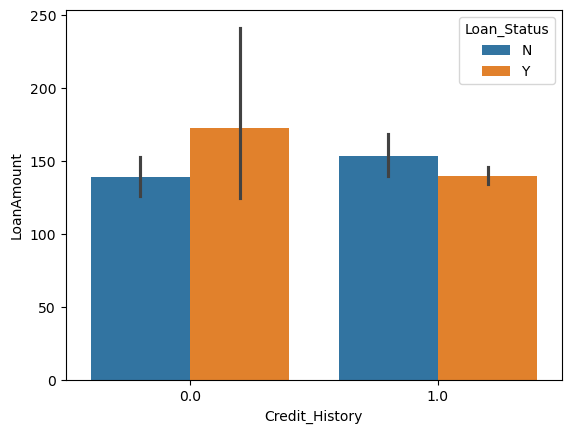

In [228]:
# 71
# BAr plot fot the average LoanAmount by Credit_History and Loan_Status?
sns.barplot(x='Credit_History', y='LoanAmount', hue='Loan_Status', data=df)

In [229]:
# 72
# What is the average overall_income by Property_Area and Loan_Status?
df.groupby(['Property_Area', 'Loan_Status'])['overall_income'].mean()

Property_Area  Loan_Status
Rural          N              6862.864416
               Y              6688.432102
Semiurban      N              6468.163377
               Y              6389.985850
Urban          N              6432.848415
               Y              6459.198832
Name: overall_income, dtype: float64

<Axes: xlabel='Property_Area', ylabel='overall_income'>

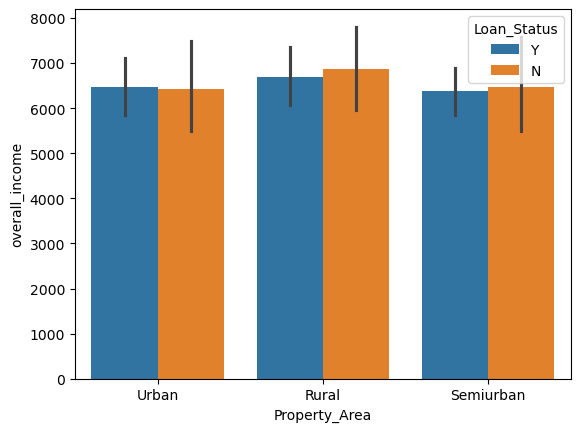

In [230]:
# 73
# bar plot for the average overall_income by Property_Area and Loan_Status?
sns.barplot(x='Property_Area', y='overall_income', hue='Loan_Status', data=df)

<Axes: >

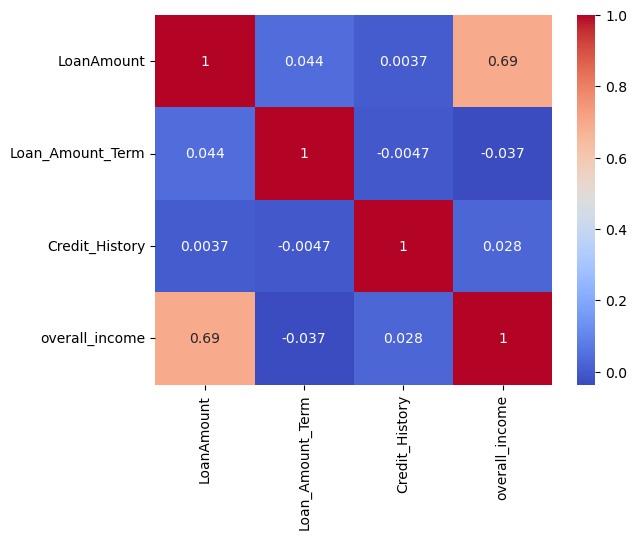

In [231]:
# 74
# What is the correlation between numerical variables like LoanAmount, Loan_Amount_Term, overall_income, and Credit_History?
corr_matrix = df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'overall_income']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

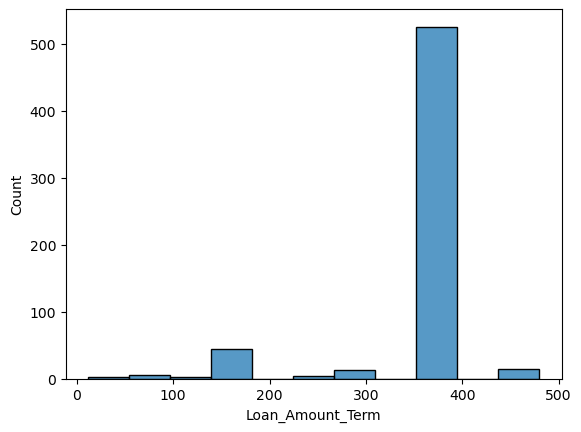

In [232]:
# 75
# What is the distribution of Loan amount term
sns.histplot(df['Loan_Amount_Term'])